# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

Running agent.py displays a grid-like world where each row and column represent a road and each overlapping occurrence represents an intersection. If you were to view the visualization as a graph you would say that the intersections can be represented as nodes and the roads connecting each intersection as edges. There are many autonomous agents (cars) moving around the world and a white car with Udacity's logo that represents the agent (smartcab). The agent doesn't move during the simulation and seems to have a randomly initialized starting location. The agent receives a combination of positive and negative rewards associated with the action 'no action taken'. The sign of the reward seems to be dependent on the state of the light at each timestep, with positive rewards for staying stationary during a red light and negative rewards for staying stationary at a green light. The state of the traffic does not seem to affect the sign of the reward. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

### agent.py

epsilon - determines the random exploration factor

alpha - determines the learning rate

learning - boolean value to enable/disable learning

### environment.py

act(self, agent, action) is the method called when an agent performs an action


### simulator.py

render_text() is for non-GUI (terminal) rendering of the simulation. render() is for GUI simulation rendering.

### planner.py

East-West direction is checked first by the next_waypoint() method.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


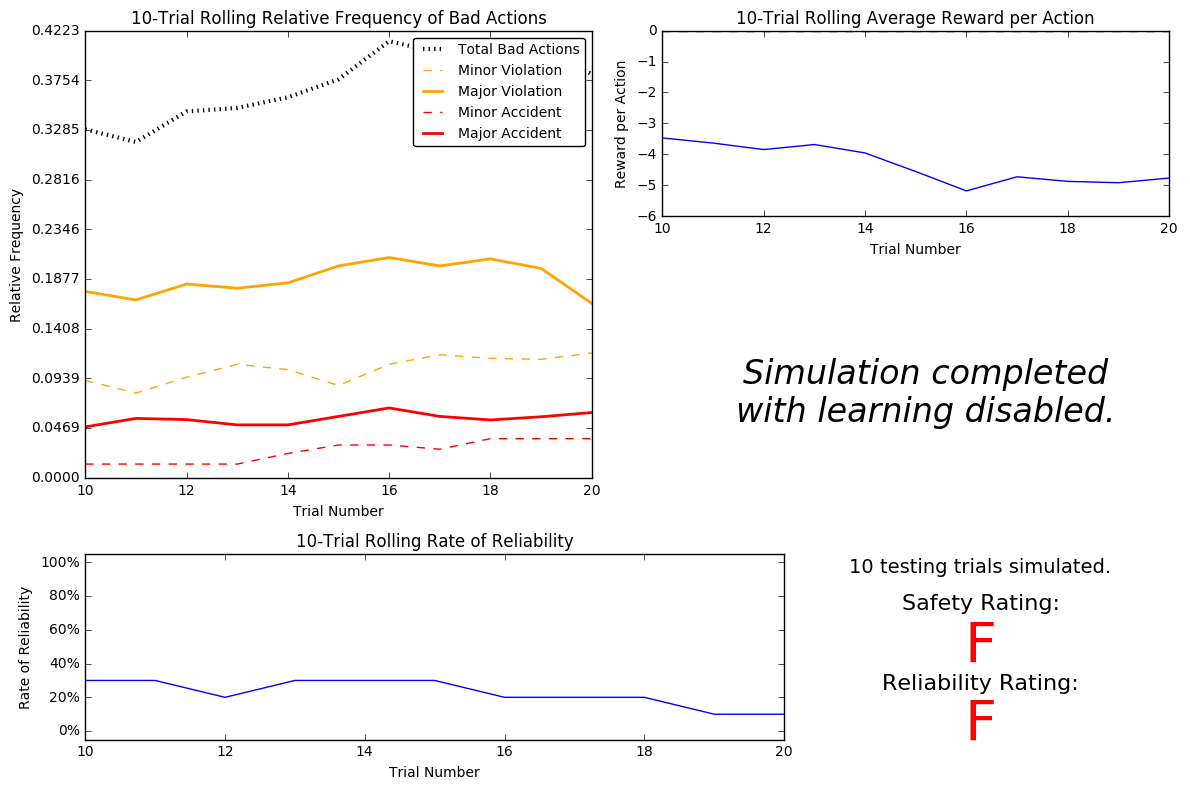

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

### Observations

10-trial rolling frequency of bad actions: Perhaps alarmingly our agent shows an immediate increase in the total frequency of bad actions, however this is purely due to chance as our agent does not learn and continues to take random actions. What's more interesting in this graph is the rough average of each of the lines, indicating the performance of a completely random agent. As you can see the total frequency of bad actions hovers between 30% and 40%. Safe to say I would not be riding in this cab in its current state. Of this total, the persistently highest category of bad action is a 'major violation', occurring between 17% to 20% of the time. Minor violations occur second most frequently, between 9% and 12% of the time, major accidents are next occurring about 5% of the time, and lastly minor accidents occurring between 1% and 4% of the time. To me there seems to be a rough relationship between respective classes of violations and accidents, with an accident occurring about 1/5 of the time a given class of violation/accident occurs. 

10-trial rolling reward per action: Once again, as our agent doesn't learn I won't read into the trend as it is the result of random actions. The important point is that the rolling reward per action is permanently negative, fluctuating around a value of -4. This indicates our agent is consistently being penalized for bad behavior. Not ideal, but expected.  

10-trial rolling rate of reliability: The rate hovers around 20% which provides us with a performance benchmark based on an agent that simply acts randomly and without intention to maximize reward. In other words, an agent acting randomly will manage to reach its destination within the given environment and timeframe around 20% of the time. 

Exploration and Learning factor plot: This plot is supposed to illustrate the the trend of exploration and learning  factors over time. As our agent does not learn and we have not set any epsilon or alpha rules, we are simply left with the default values that do not change over time.

10 testing trials score: This display shows the scores rewarded to our agent for safety and reliability after 10 simulated testing trials. Scores of F for both safety and reliability indicate the poorest level of performance obtainable under the above scheme and are to be expected given the nature of our simulation and actions of our agent.

### Summary

As expected, a completely random agent that takes no head of traffic rules or the actions of other agents performs poorly in regards to both safety and reliability. As our agent essentially ignores all input, we see constant poor performance with respect to the frequency of accidents/violations, reliability and reward per action. There is no way that this smartcab would be considered safe or reliable by any passengers in its current state. 

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

In my opinion, waypoint and inputs are most important for both safety and efficiency, in fact I believe that waypoint and inputs are the most important features for efficiency and safety respectively. 

Firstly efficiency. Efficiency is concerned with the agent successfully navigating to the goal withing the alloted deadline. At any given point in time there are a maximum of two and a minimum of one direction/s that move our agent closer to its goal. For the purpose of our model there is no point in even considering moving in the other directions because, although they could in fact lead to a more efficient path (as a result of avoiding traffic), we have no way of reliably modeling these paths as our agent only has knowledge of those cars in its immediate vicinity. Since the waypoint feature points in a direction of the goal, it acts as a defacto efficiency heuristic. What interesting is what I perceive to be a bias in the way the choice for the next waypoint is chosen. It seems to me that the logic for choosing the next waypoint is structured in such a way as to consider (and as a result, choose) east and west directions before those of north and south leading to a bias towards the later when more than one direction could be considered optimal. 

Secondly, inputs. Inputs give us information on the color of the light and the location of environmental agents, in particular their presence and intentions. The inputs feature is critical for the safety of our agent as it allow us to determine whether an action by our agent would result in a 'bad action' and the level of severity of that action. The lights attribute allows us to determine whether a given action by our agent will be deemed as a 'bad action' of any kind, and the directional attributes of the autonomous agents allow us to determine the severity of that 'bad action'. There is one component of input that is however, irrelevant. Inputs['right'] doesn't effect the decision of our agent as, during a green light any agent to our right will give way to our agent, and in the case of a red light the only action we can take safely other than to do nothing will be to turn right if inputs['left'] != forward which is not affected by the actions of inputs['right']. This means that we can remove inputs['right'] from our state considerations to reduce our state space. 

Lastly, deadline. The deadline feature provides information on the number of time-steps our agent has available in order to reach its goal in an efficient manner. I have chosen not to include this feature in the agent's state because I do not think it is important to the decision making process. The reason I don't think it's appropriate is the context of the problem at hand. In our problem, we are dealing with the modeling of a self-driving cab. Whilst efficiency is an important consideration for our agent's performance, I would argue that it, in the context of our grid-like model is maximized to the extent possible by the waypoint feature. Also, I would argue that safety is the more important attribute of our agent's performance, so much so that it should not be compromised under any circumstances by efficiency. Maybe in the context of emergency services like ambulances, police and fire trucks this may change, however we have the luxury of only being concerned with the performance of a smartcab. Including the deadline feature in our state will only lead to an inflated state space, making it much harder of our agent to learn. For these reasons I have come to the conclusion that any decisions made by our agent would be independent of the value for deadline, thus making the feature irrelevant. 

In summary, I have chosen to implement waypoint and inputs (excluding inputs['right']) in my agent's state.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

A rough calculation for the size of the state space includes: 
3 - num of waypoint choices
2 - num of light states
4 - num of choices for each dummy agent (left, right, forward, none)
2 - num of directions in which to consider traffic (only oncoming and left)

3 x 2 x 4^2 = 96

or 96 states. A constant value for the number of states in our environment means the state space is not too complex for our learning agent to explore within a reasonable amount of trials. We must however also consider the chance of encountering each state when determining whether our agent is able to efficiently learn a policy for each state. Given the default number of dummy agents in relation to the size of the environment, I feel as though the agent can learn a policy for each of the states within a reasonable number of trials. If the number of dummy agents was considerably larger or smaller in relation to the environment, the ability of the agent to experience certain states would be severely impeded.

*Note that the above calculation does not consider any reduction in choices when considering an edge state (for example, ignoring theoretical agents off the map), as it doesn't really influence the answer. It also doesn't consider any possible smart reductions in the state space (such as condensing all permutations of a given intersection with a red light into one), as they reflect choices and assumptions about the actions of our agent (in this case we would be assuming that our agent always takes no action when a red light is present). 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

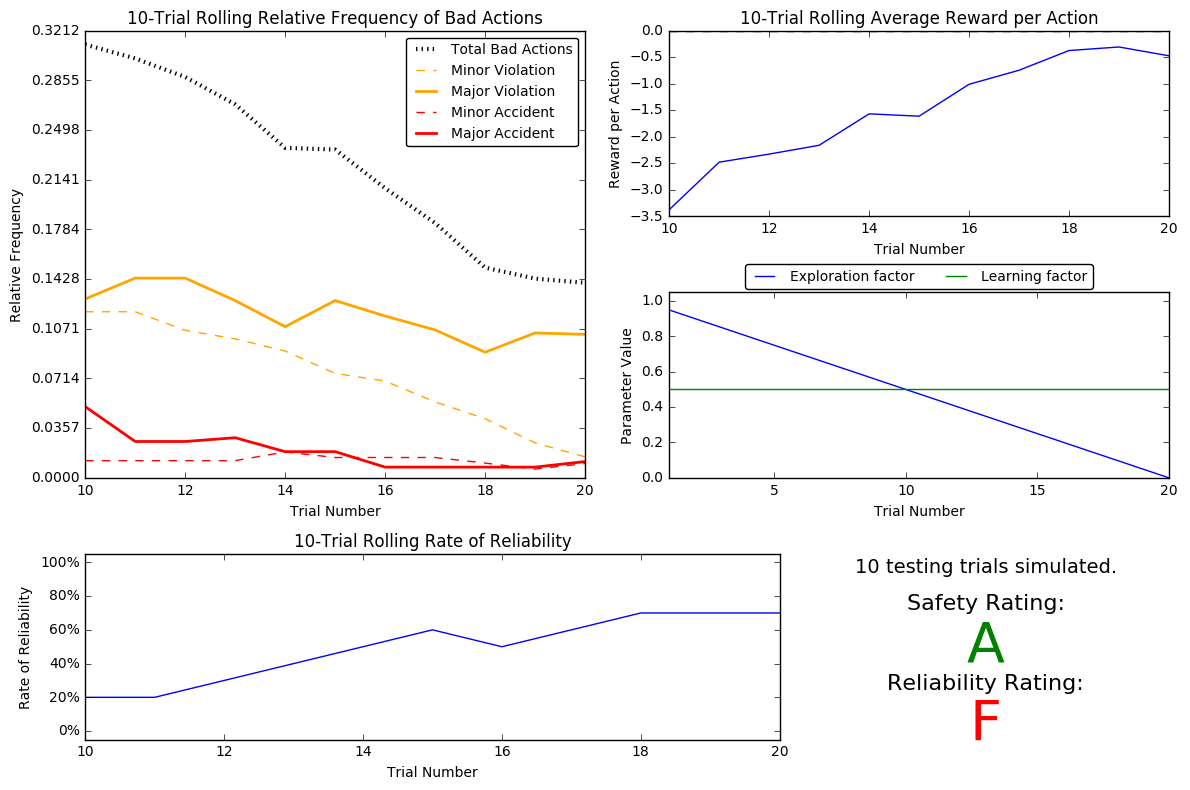

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

### Observations

10-trial rolling frequency of bad actions: Now that our agent is learning we can see a steady decline in the total number of bad actions. All components of the bad actions plot start out in the same ballpark as our original random agent, which is to be expected given the initial random exploration of our new agent. The decline of total bad actions seems to be the result of a simultaneous decline in minor violations, major violations and major accidents while the number of minor accidents seems to stay steady. Minor accidents are however, the least common form of bad action across both simulations, so maybe this lack of learning is due to a lack of frequency. 

10-trial rolling reward per action: This time, the trend in reward per action is up and we have reason to believe that this is not due to random chance as our agent should be learning to take actions that maximize reward. The average reward still never breaks above 0 indicating that our agent is still being penalized on average for its actions and therefore still making a large number of bad actions. Given the trend, one would assume that simply increasing the number of trials will result in the agent obtaining a positive average reward, although this could also be achieved through faster learning or smarter decision making.   

10-trial rolling rate of reliability: There is a distinct upward trend in the agent's rolling rate of reliability. This is in stark contrast to that of our random agent who's reliability actually decreased over the length of the simulation. The upward trend, much like that for the rolling average reward per action, is up indicating that more training may continue to improve our agents performance, however this may also be achieved through faster learning or superior decision making.  

Exploration and Learning factor plot: Unlike the constant nature of the random agent's epsilon value, we can see a linear decline in the epsilon value for our new agent. The decline is in line with that of the function given for epsilon, with a slope of -0.05 and an intercept of 1. The agent took 20 training trials before entering the testing phase which is in line with the function, as by the 20th trial epsilon = 1 - 0.05*20 = 0 and at which point our agent is no longer exploring the environment and testing is triggered (at epsilon < 0.05). Alpha is shown as constant and equal to the default value which is correct given we have not implemented a function to alter it over the number of trials.

10 testing trials score: The agent's overall scores of A for safety shows a stark improvement by our agent over that of our random agent. A safety rating of A means that our agent only committed a small number of minor violations and avoided any minor or major accidents. This is great news but I feel it slightly inflates the current performance of the agent when considering the above rolling frequency of major violations. Unfortunately the same improvement in performance has not occurred in reliability which has retained the lowest possible rating of F. It is obvious from the rolling reliability plot that significant improvement over the random agent has been achieved, however the lack of rating improvement indicates that significant performance improvement is still warranted.

### Summary

As indicated above, the improvement in performance of the agent over that of its random counterpart is considerable, however it is still unacceptable from a passenger's perspective. Reliability of the smartcab still lingers below 60% and safety can still be improved. Improvements will need to be made before the cab is suitable for (theoretical) passengers. Possible areas for improvement include: longer train time, slower decay in exploration factor, higher or decaying learning rate, and smart hard-coded rules such as no action at a red light.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

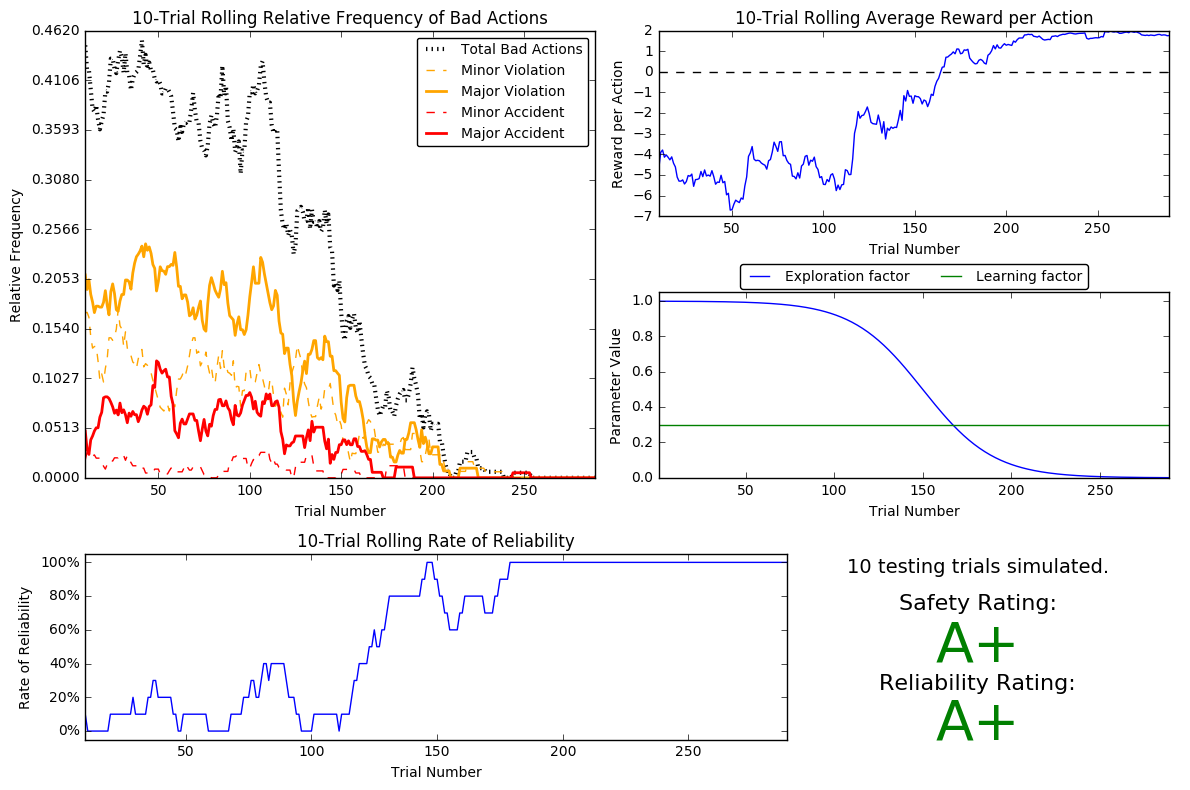

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

### Observations

10-trial rolling frequency of bad actions: The total bad actions plot trends downward following the general trend of the sigmoid exploration function. This is to be expected as for early trials the exploration factor is close to 1, allowing the agent to act randomly and gain experience about the consequences for the various actions in each state. As the number of trials increases the exploration factor drops off, reinforcing the best learned behavior and leading to a situation where all forms of bad action are close to 0. This is a significant improvement over the  basic agent and illustrates mainly the advantages of allowing the agent to explore for a larger number of trials.

10-trial rolling reward per action: The trend is distinctly up and after about 175 trials, becomes consistently positive. This is a great outcome as previously we were unable to reach a situation where our agent was able to make consistent decisions that lead to positive rewards. This plot shows that our agent was able to sufficiently explore the state space to such a degree as to allow it to successfully exploit actions leading to positive rewards. 

10-trial rolling rate of reliability: Finally our agent was able to achieve a desirable rate of reliability! Previously we witnessed a upward trend in the reliability of our agent and hypothesized that with more training we would be able to reach an acceptable rate of reliability. As it turns out, this was in fact true and after around 175 trials our agent was able to reach the goal within the alloted number of trials with near perfect consistency.  Too few trials and the agent simply doesn't have enough information about the environment to effectively exploit a reliable set of actions. I can imagine that for a small number of trials, any optimal actions are determined by avoiding accidents rather than successfully making it to the goal. As for the plot itself, the rate stays low while our agent's exploration factor remains high. After around 100 trials, the agents reliability begins to improve. This is in line with the way our exploration factor switches from exploration to exploitation. From around trial 175, our agent maintains a reliability rating of about 100% as the exploration factor drops below 20%.

Exploration and Learning factor plot: As you can see from the plot, I decided to go for a kind of reverse sigmoid function, centered at t = 150 and stretched over about 300 trials. The exact formula is:

self.epsilon = 1 / (1 + math.exp(0.05 * (self.count - 150)))

The goal of this function was to provide a sufficient number of trials for the agent to explore the state space and then a sufficient number of trials for the agent to reinforce the most desirable behavior. I found this style of formula to be much more successful than those suggested above as both exploration and exploitation seemed to be essential for developing an effective policy in a reasonable amount of trials. As for the alpha value, I tried multiple constant values and decreasing functions to little to no effect. It seems that the importance of the alpha factor is dwarfed by the choices for epsilon and n-trials.

10 testing trials score: My agent is able to robustly score A+ ratings for safety and reliability. It seems as though the most important factor contributing to this performance increase was a high number of trials at a high exploration rate, to give the agent sufficient information about the state space. The sweet spot seems to be around 150 trials at a high exploration rate and around 200 to 300 trials overall. Allowing a sufficient n-trials to reinforce the best learned actions also seemed to improve safety and reliability.  

### Summary

In summary, I think the agent successfully learned an appropriate policy in the current context of the simulation. The agent achieves a near 0 frequency of bad actions and a rolling reliability rating of 100%. Minor improvements could be made by further tweaking epsilon, alpha and n-trials, however any major improvements would not likely be possible without changing some of the more fundamental components of the simulation. Given this level of performance, I am satisfied with the performance of the smartcab.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

The optimal policy is the one in which the agent obeys the traffic rules whilst moving in the direction of the waypoint: stopping for red lights unless to turn right and it is safe to do so, moving on green lights in the direction of the waypoint if it is safe to do so, moving in another direction (that is safe) if it is not.

There are many examples in 'sim_improved-learning.txt' that show that the agent has learned the optimal policy for a given state. Some examples where the agent has learned the optimal policy include:

(Waypoint, light, car_to_left, oncoming_car)

('right', 'green', None, 'forward')

-- forward : 0.76

-- right : 1.98

-- None : -5.08

-- left : 0.73

The agent has learned to turn right in the direction of the waypoint on a green light. It has also learned that doing nothing in this scenario is detrimental. 

('right', 'red', 'right', 'forward')

-- forward : -3.26

-- right : 1.49

-- None : 0.06

-- left : 0.00

The agent has learned that turning right in the direction of the waypoint on a red light is the preferred action when the car to it's left is turning right (in other words it is not pulling out in front of an oncoming car).

('left', 'red', None, 'forward')

-- forward : -18.32

-- right : 0.52

-- None : 1.74

-- left : -15.61

The agent has learned that it is best to take no action when faced with a red light and a desire to turn left.

An example where the agent has learned a sub-optimal policy is:

('right', 'green', 'right', 'right')

-- forward : 0.00

-- right : 0.00

-- None : 0.00

-- left : 0.64

The waypoint is to the right and the agent has a green light, it is completely safe and desirable for the agent to turn to it's right yet it turns in the exact opposite direction to it's left. This is undesirable since the agent is moving further away from its destination and to make matters worse, it is safe to move in the direction of the destination. As you can see above, Q-values for all actions apart from left remain at 0. This indicates a state space that has not been fully explored. It is very likely that if the agent had in fact explored any of the other actions available, left would not have the highest q-value. This indicates that more trials at a high exploration rate could improve the agent further.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.